# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Setting units to Metric
units = "metric"

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url)
        city_weather = weather_json.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | philadelphia
Processing Record 2 of Set 1 | revda
Processing Record 3 of Set 1 | suileng
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | colonia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | pathalgaon
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bentiu
Processing Record 15 of Set 1 | ingeniero guillermo n. juarez
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | sihanoukville
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | lerwick
Processing Record 21 of Set 1 | villa gesell
Processing Record 22 of Set 1 | clarksburg
Proce

Processing Record 36 of Set 4 | petrov val
Processing Record 37 of Set 4 | fortaleza
Processing Record 38 of Set 4 | cadale
Processing Record 39 of Set 4 | eunapolis
City not found. Skipping...
Processing Record 40 of Set 4 | lu-uk
Processing Record 41 of Set 4 | katsuren-haebaru
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | pacocha
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | fort saskatchewan
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | lubang
Processing Record 49 of Set 4 | raychikhinsk
Processing Record 0 of Set 5 | waxahachie
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | galesong
Processing Record 3 of Set 5 | bereket
Processing Record 4 of Set 5 | bani walid
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | fort bragg
Processing Record 7 of Set 5 | garoua boulai
Processing Record 8 of Set 5 | kandahar
Proce

Processing Record 30 of Set 8 | san pedro pochutla
Processing Record 31 of Set 8 | zharkent
Processing Record 32 of Set 8 | agrestina
Processing Record 33 of Set 8 | nizhnesortymskiy
Processing Record 34 of Set 8 | cortez
Processing Record 35 of Set 8 | sosnovka
Processing Record 36 of Set 8 | keflavik
Processing Record 37 of Set 8 | glace bay
Processing Record 38 of Set 8 | gisborne
Processing Record 39 of Set 8 | naro moru
Processing Record 40 of Set 8 | tralee
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | barberton
Processing Record 43 of Set 8 | bamboo flat
Processing Record 44 of Set 8 | kamianka
Processing Record 45 of Set 8 | susuman
Processing Record 46 of Set 8 | anshun
Processing Record 47 of Set 8 | bel ombre
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | veranopolis
Processing Record 0 of Set 9 | helsinge
Processing Record 1 of Set 9 | goundi
Processing Record 2 of Set 9 | liberty
Processing Record 3 of Set 9 | vi

City not found. Skipping...
Processing Record 19 of Set 12 | turtas
Processing Record 20 of Set 12 | chernyshevsk
Processing Record 21 of Set 12 | nkhata bay
Processing Record 22 of Set 12 | tacuarembo
Processing Record 23 of Set 12 | robertsport
Processing Record 24 of Set 12 | jimenez
Processing Record 25 of Set 12 | ghat
Processing Record 26 of Set 12 | nantong
Processing Record 27 of Set 12 | waddan
Processing Record 28 of Set 12 | banda aceh
Processing Record 29 of Set 12 | weno
Processing Record 30 of Set 12 | olonets
Processing Record 31 of Set 12 | copan
Processing Record 32 of Set 12 | sucre
Processing Record 33 of Set 12 | lorengau
Processing Record 34 of Set 12 | rio branco
Processing Record 35 of Set 12 | altamira
Processing Record 36 of Set 12 | elverum
Processing Record 37 of Set 12 | magdalena de kino
Processing Record 38 of Set 12 | dhromolaxia
Processing Record 39 of Set 12 | kaka
Processing Record 40 of Set 12 | armacao de buzios
Processing Record 41 of Set 12 | sinop

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,philadelphia,39.9523,-75.1638,9.94,55,75,6.69,US,1699757038
1,revda,56.8010,59.9303,1.48,98,100,1.80,RU,1699757178
2,suileng,47.2500,127.0833,-7.90,79,14,2.76,CN,1699757178
3,waitangi,-43.9535,-176.5597,14.34,77,0,0.89,NZ,1699757179
4,ilulissat,69.2167,-51.1000,-6.99,49,75,8.23,GL,1699757180


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,philadelphia,39.9523,-75.1638,9.94,55,75,6.69,US,1699757038
1,revda,56.8010,59.9303,1.48,98,100,1.80,RU,1699757178
2,suileng,47.2500,127.0833,-7.90,79,14,2.76,CN,1699757178
3,waitangi,-43.9535,-176.5597,14.34,77,0,0.89,NZ,1699757179
4,ilulissat,69.2167,-51.1000,-6.99,49,75,8.23,GL,1699757180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

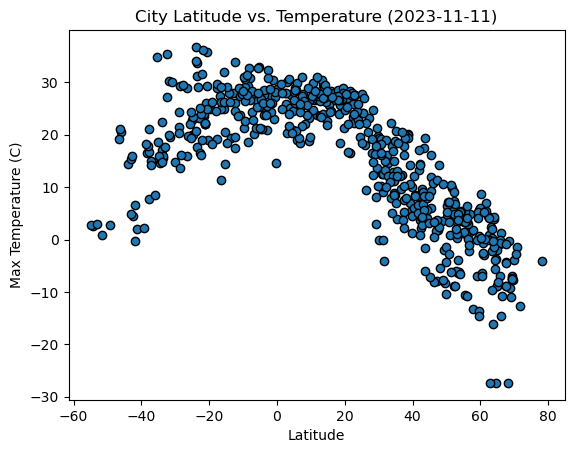

In [201]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2023-11-11)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

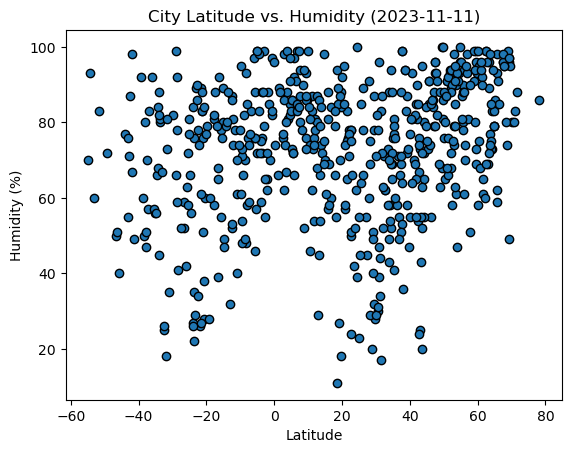

In [203]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-11-11)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

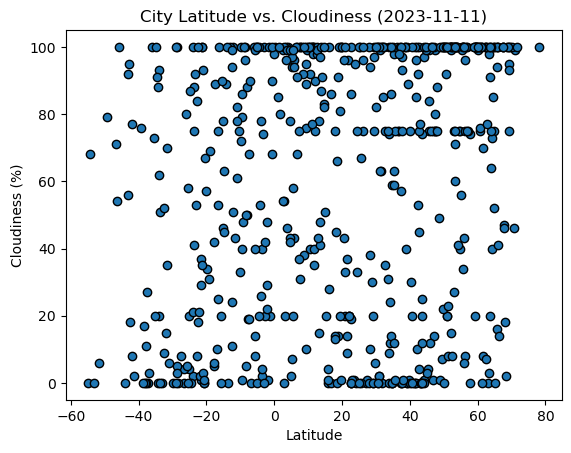

In [204]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-11-11)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

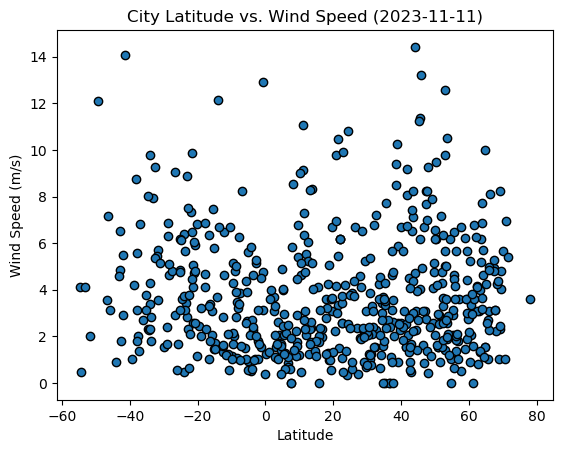

In [205]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis,y_axis,edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-11-11)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,philadelphia,39.9523,-75.1638,9.94,55,75,6.69,US,1699757038
1,revda,56.8010,59.9303,1.48,98,100,1.80,RU,1699757178
2,suileng,47.2500,127.0833,-7.90,79,14,2.76,CN,1699757178
4,ilulissat,69.2167,-51.1000,-6.99,49,75,8.23,GL,1699757180
5,colonia,50.9333,6.9500,5.97,91,20,1.54,DE,1699756927


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,14.34,77,0,0.89,NZ,1699757179
6,port-aux-francais,-49.3500,70.2167,2.73,72,79,12.12,TF,1699757181
8,blackmans bay,-43.0167,147.3167,15.29,55,92,6.53,AU,1699757182
14,ingeniero guillermo n. juarez,-23.9000,-61.8500,36.77,27,2,6.41,AR,1699757186
15,west island,-12.1568,96.8225,27.99,74,100,4.63,CC,1699757187


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8861955164513597


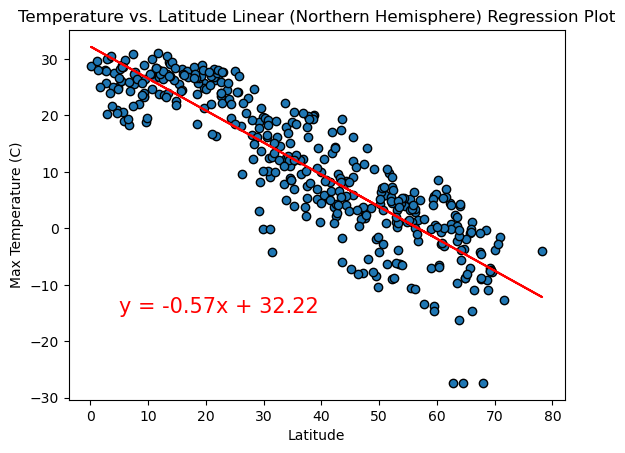

In [166]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature vs. Latitude Linear (Northern Hemisphere) Regression Plot')
plt.plot(northern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(5,-15),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.6224781133565104


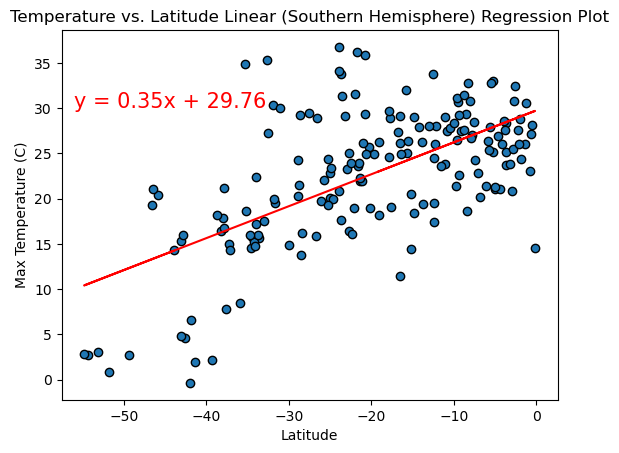

In [168]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature vs. Latitude Linear (Southern Hemisphere) Regression Plot')
plt.plot(southern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(-56,30),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1934432058234875


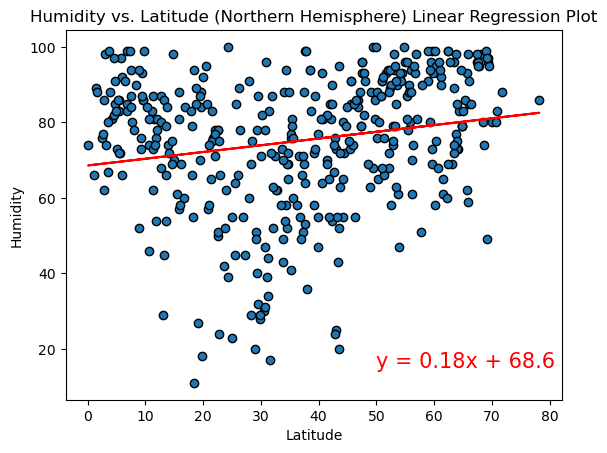

In [176]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Northern Hemisphere) Linear Regression Plot')
plt.plot(northern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.1834434250417424


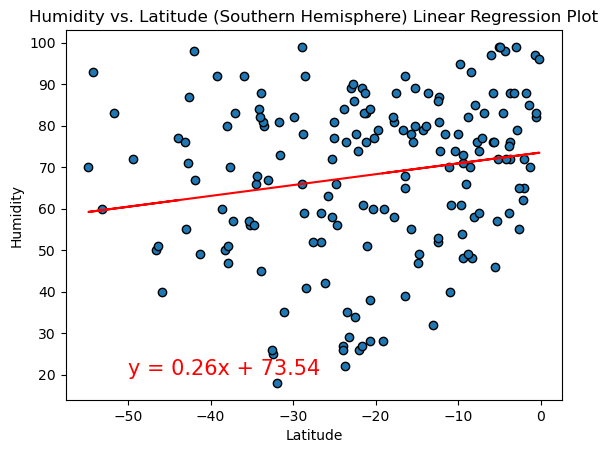

In [181]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude (Southern Hemisphere) Linear Regression Plot')
plt.plot(southern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07588255830564912


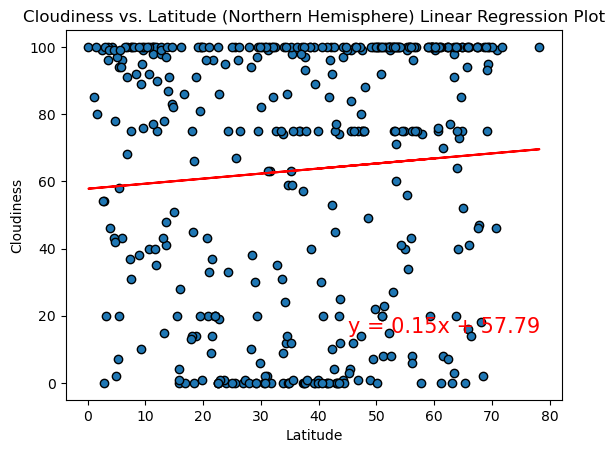

In [184]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Northern Hemisphere) Linear Regression Plot')
plt.plot(northern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.18480831611314733


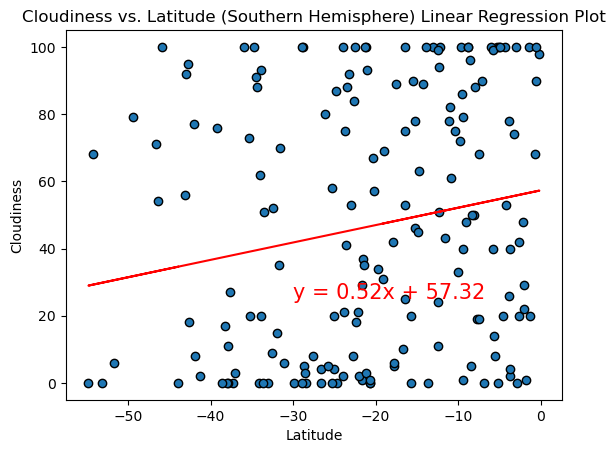

In [190]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude (Southern Hemisphere) Linear Regression Plot')
plt.plot(southern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1398732559700901


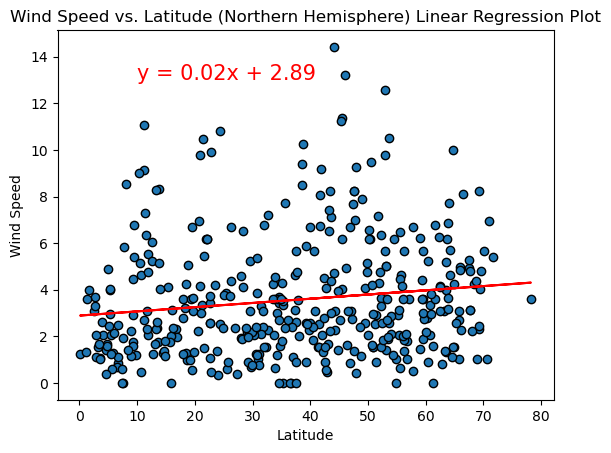

In [195]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Northern Hemisphere) Linear Regression Plot')
plt.plot(northern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(10,13),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: -0.21122917691153084


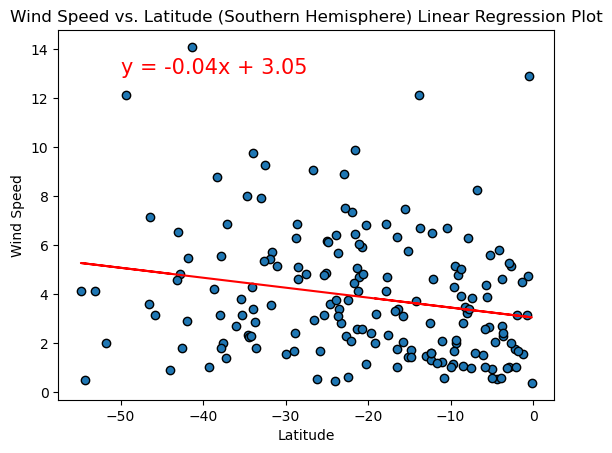

In [200]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.scatter(x_axis,y_axis,edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude (Southern Hemisphere) Linear Regression Plot')
plt.plot(southern_hemi_df["Lat"],regress_values, "r-")
plt.annotate(line_eq,(-50,13),fontsize=15,color="r")
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE